In [20]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline

In [15]:

def accuracy_report(name, predicted,original):
    error = np.sqrt((mean_squared_error(predicted,original)))
    print(name, "  Root Mean Square Error ","--", error)
    return error

In [11]:
train = pickle.load(open("../pickles/train_data.p",'rb'))
test = pickle.load(open("../pickles/test_data.p",'rb'))
target = pickle.load(open("../pickles/target.p",'rb'))
test_id = pd.read_csv("input/test.csv",header=0,usecols=["Id"])
x_train,x_val,y_target,y_val = train_test_split(train,target,random_state = 0)


In [12]:
## All the algorithms that we ran

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

model_name = ["Linear","Ridge","Lasso","Elastic","Bagging","Adaboost","Decision Tree","Gradient Boosting"]
model_l = []
linear = LinearRegression().fit(x_train,y_target).predict(x_val)
ridge = Ridge().fit(x_train,y_target).predict(x_val)
lasso = Lasso().fit(x_train,y_target).predict(x_val)
elastic = ElasticNet().fit(x_train,y_target).predict(x_val)
bagging = BaggingRegressor().fit(x_train,y_target).predict(x_val)
boosting = AdaBoostRegressor().fit(x_train,y_target).predict(x_val)
decision = DecisionTreeRegressor().fit(x_train,y_target).predict(x_val)
Gradient = GradientBoostingRegressor(n_estimators=120,learning_rate=0.09,max_depth=5,max_features=68,random_state=0).fit(x_train,y_target).predict(x_val)
model_l.append(linear)
model_l.append(ridge)
model_l.append(lasso)
model_l.append(elastic)
model_l.append(bagging)
model_l.append(boosting)
model_l.append(decision)
model_l.append(Gradient)


In [16]:
acc_l= []
for i in range(len(model_l)):
    acc = accuracy_report(model_name[i],model_l[i],y_val)
    acc_l.append(acc)

Linear   Root Mean Square Error  -- 28842.5060797
Ridge   Root Mean Square Error  -- 27703.2894899
Lasso   Root Mean Square Error  -- 28703.7439831
Elastic   Root Mean Square Error  -- 31824.3813774
Bagging   Root Mean Square Error  -- 25783.6002611
Adaboost   Root Mean Square Error  -- 29167.1194946
Decision Tree   Root Mean Square Error  -- 35286.0481663
Gradient Boosting   Root Mean Square Error  -- 22066.3871898


In [17]:
import seaborn as sns
acc_l

[28842.506079748378,
 27703.289489923565,
 28703.743983093282,
 31824.3813774191,
 25783.600261126245,
 29167.119494554026,
 35286.048166308661,
 22066.387189825797]

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

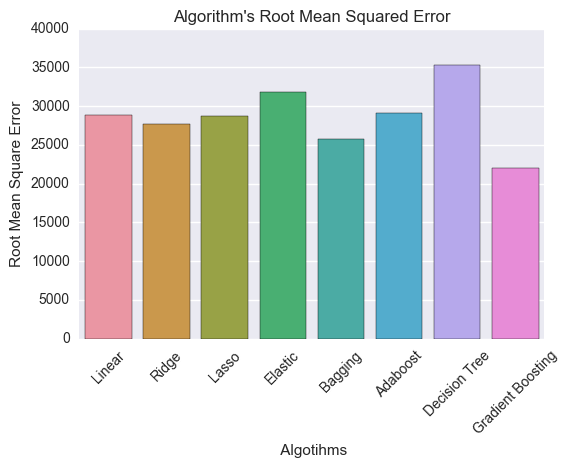

In [38]:
algorithm = sns.barplot(x = model_name,y=acc_l)
algorithm.set(xlabel=" Algotihms",ylabel= "Root Mean Square Error")
sns.plt.title("Algorithm's Root Mean Squared Error")
sns.plt.xticks(rotation=45)